# Lucas (1990) "Why Doesn't Capital Flow from Rich to Poor Countries?"

Summary and analytical notes on the paper:

>Lucas, Robert E. (1990) "Why Doesn't Capital Flow from Rich to Poor Countries?" *American Economic Review*: 92-96.

## Neoclassical predictions:
 - the convergence of factor prices and incomes per-capita over time (Factor Price Equalization Theorem)
 - via substitute mechanisms: factor movement, trade in products, and/or capital accumulation (e.g. Solow). 
 - rests on assumptions about technology and market competition
      - in particular: diminishing returns to the accumulated factor capital (i.e. $F_{KK} < 0$ ).

### Simplest model
Assume two countries with same aggregate production function, where $X$ is capital stock and $L$ is labor force:

$$Y = A X^\beta L^{1-\beta}$$

**in intensive or per-capita form**:
$$y = A x^\beta$$

where 
$$y = \frac{Y}{L} \text{    and    } x = \frac{X}{L}$$

**Marginal Product of Capital (MPK) is:**

$$r = A \beta x^{\beta -1}$$


**Write MPK as a function of income per capita:**

    
$$r = \beta A^\frac{1}{\beta} y^\frac{\beta -1}{\beta}$$   

or 

$$r = A \beta \left ( {\frac{y}{A}} \right ) ^\frac{\beta - 1}{\beta}$$
    


Steps:

$$y = A x^\beta  $$
so 
$$x = \left ({\frac{y}{A}}  \right)^\frac{1}{\beta}   $$

substitute this into $r = A \beta x^{\beta -1}$

### The puzzle
 - Let capital share $\beta =0.4$ (average of USA and India)
 - Assume first that $A$ is the *same* in both countries

 - In 1988 income per capita in USA was 15 times higher than USA:
 
$$\frac{y_{US}}{y_{IN}} = 15$$


 - this implies MPK in India would have to be:
 
 $$\frac{r_{IN}}{r_{US}} = \left [ { \frac{y_{US}}{y_{IN}} } \right] ^ \frac{1-\beta}{\beta} = 58.1$$
 
 times higher in India!  Implausibly large.

What differences in capital per worker account for this large a gap?

As $x = \left ({\frac{y}{A}}  \right)^\frac{1}{\beta} $ and  $\frac{y_{US}}{y_{IN}} = 15$, US workers would have to have this 
 
 $$\frac{x_{US}}{x_{IN}} = \left ( {\frac{y_{US}}{y_{IN}}}  \right)^\frac{1}{\beta} = 871.4$$
 
multiple of the amount of capital per worker compared to India:
 
 So if in India the capital-labor ratio is 1 in the USA it must be 871.4 !  

 - With such huge differences in returns, capital would surely RUSH from USA to India quickly lower the gap in returns and incomes.  

 -  Evidently it does not.  So what's wrong with the model?  Lucas walks through 4 alternate hyptotheses.

### Some plots

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import fsolve, brentq, minimize

In [2]:
A = 1 
rho = 0.05
beta = 0.4
y_US = 15
y_IN = 1

def f(x):
    return x**beta

def mpx(x):
    return beta*x**(beta-1)

def r(y, A):
    return beta * (A**(1-beta)) * y**((beta-1)/beta)
    
def kap(y, A):
    return (y/A)**(1/beta)

def xoptimum(rho, beta):
    xC = (rho/beta)**(1/(beta-1))
    xM = (rho/beta**2)**(1/(beta-1))
    return xC, xM

In [3]:
def lucasplot():
    y = np.linspace(0.1,20,100)
    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,1)
    plt.plot(y,kap(y, A))
    plt.ylabel("$k$ -- capital per worker")
    plt.ylim(0,kap(y_US +1, A))
    plt.axvline(y_IN,color='k',ls='dashed')
    plt.axvline(y_US,color='k',ls='dashed')
    plt.title("capital per worker")

    plt.subplot(2,1,2)
    plt.plot(y,r(y,A))
    plt.xlabel("$y$ -- output per worker")
    plt.ylabel("$4$ -- marginal product capital")
    plt.title("return to capital")
    plt.ylim(0,r(y_IN,A))
    plt.axvline(y_IN,color='k',ls='dashed')
    plt.axvline(y_US,color='k',ls='dashed')
    plt.annotate('India', xy=(y_IN, r(y_IN,A)), xytext=(y_IN +2, r(y_IN,A)*0.75),
                arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.annotate('USA', xy=(y_US, r(y_US,A)), xytext=(y_US +2, r(y_US,A)+0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),);

In [4]:
print('Return to capital in India relative to USA : {:5.1f}'.format(r(y_IN, A)/r(y_US, A)))

Return to capital in India relative to USA :  58.1


The ratio of capital stock per worker in the USA compared to India that is implied by this difference in incomes per capita is even more unbelievable:

In [5]:
print('Capital per worker in USA relative to India : {:5.1f}'.format(kap(y_US, A)/kap(y_IN, A)))

Capital per worker in USA relative to India : 871.4


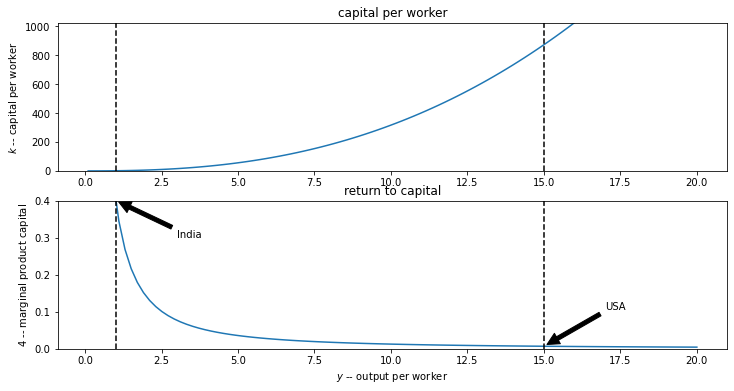

In [6]:
lucasplot()

## The four hypotheses:

 1.  Differences in Human Capital (effective labor) 
 2. External Benefits of Human Capital (increasing returns) 
 3. Capital Market Imperfections I (political risk) 
 4.  Capital Market Imperfections II (monopoly distortions) 

### Hypothesis 1: Human Capital differences

Human capital per worker differs substantially between USA and India. Let's adapt the framework to take this into account.

Redefine $y$ and $x$ to be output and capital per *effective* worker (replace every $L$ by $E \cdot L$). 

$$y = \frac{AX^\beta (E \cdot L)^{(1-\beta)}}{E \cdot L}$$
or
$$y=Ax^\beta \cdot E ^{-\beta}$$

Lucas' cites evidence from Anne Krueger that leads him to suggest a value of $E =5$, which is to say that for the same technology and capital a US worker produces five times as much as his/her Indian counterpart. 

To see this first note that if we take the ratio of US to Indian income per effective worker we get:

$$\frac{y_{US}}{y_{IN}} = \frac{Y_{US}}{E \cdot L_{US}} \cdot \frac{L_{IN}}{Y_{IN}}=\frac{15}{5} = 3$$

With this we can easily calculate the implied difference in marginal products of capital:

$$\frac{r(y_{IN})}{r(y_{US})}= \left ( \frac{y_{US}}{y_{IN}} \right )^\frac{1-\beta}{\beta}$$

$$=3^{1.5} = 5.2$$

So this lowers the factor of proportionality from 58 to 5. As Lucas puts it: "This is a substantial revision but it leaves the original paradox very much alive: a factor of five differnce in rates of return is tstill large enough to lead one to expect capital flows much larger than anything we observe (p. 93)."  

### Hypothesis 2: Human Capital Spillovers

We've assumed thus far that the total factor productivity parameter $A$ is the same across countries.  This is unlikely.  An easy way to resolve the paradox is to simply solve for the level of A_{US}/A_{IN} that makes he gap dissappear. 

In this section Luca isn't quite doing that but he is in effect letting the values of A differ between the two countries.  He motivates this with a stripped down version of his own Lucas (1988) paper on external economies, a model where human capital plays a role and where there is a positive external effect in human-capital accumulation in that he assumes that the marginal product of one's human capital is augmented by the average level of human capital in the economy.  In this paper he doesn't work out this model in full but uses the story to rewrite the production function as:

$$y=A h^\gamma x^\beta $$

and he then gives us some 'guestimates' as to the differences in human capital per worker in each country.  

As it turns out this is in effect equivalent to sticking to the original model and just assuming that 
$$\frac{A_{US}}{A_{IN}} = 5$$

A country with a higher level of $A$ will have everywhere higher return on capital. After a little math the adjusted ratio now becomes

$$\frac{r(y_{IN})}{r(y_{US})}= \left ( \frac{y_{US}}{y_{IN}} \right )^\frac{1-\beta}{\beta}$$

$$=\frac{3^{1.5}}{5} = 1.04$$

This would seem to almost resolve the paradox but Lucas in fact dismisses it as not entirely realistic.  It assumes for example that knowledge spillovers across borders are zero.


 ### Hypothesis 3: Capital Market Imperfections
 
 I haven't written this up yet...

 ### Hypothesis 4: Market power distortions

This is the least often mentioned but possibly the most interesting of Lucas' hypotheses.  The hypothesis is that local elites (or 'an imperial power') are able to collude to control the entry of capital into India to drive up captial rents and drive down real wages in such a way that increase firm profits.  Implictly the story is that local elites control the organization of production and hence firm profits.   

While at first it might seem far-fetched to believe a story like this in modern times (less far-fetched in the time of the East India Company) there is plenty of evidence that capital inflows into India and other developing countries were historicallycontrolled in part to protect the rents of local elites.  Rajan and Zingales' (2013) book [Saving Capitalism from the Capitalists](http://press.princeton.edu/titles/7822.html) is full of examples of local elites lobbying government bureaucrats to establish market power.

The elite is assumed to have access to international capital markets where they can borrow capital at the rate $\rho $

If the elite ran the country as a monopoly they would choose the capital-labor ratio (by varying how much capital enters the country) to maximize profits per capita:

$$f(x) - \left [{f(x)-xf'(x)} \right ] -rx$$

Here (by Euler's Theorem) $f(x)-xf'(x)$ is the wage.

Implicit in Lucas' formulation is the idea that there is a large monopolist and a 'fringe' of smaller competitive firms, all producing the common output.  The competitive fringe hires factors until the marginal value product equals the market factor price.  By restricting capital into the economy the monopolists drives up the domestic rental price of capital.  With less capital to work with the competitive fringe hires less labor and this drives down the mearket equilibrium real wage.  Monopolist profits rise due to this monopsony power effect.

$$f(x) - \left [{f(x)-xf'(x)} \right ] -rx$$

In [7]:
x = np.linspace(0.1,40,100)


def profit(x, rho):
    return  f(x) -(f(x) -mpx(x)*x) - rho*x

def monopolyplot(rho):
    prf = profit(x, rho)
    xC, xM = xoptimum(rho, beta)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    plt.plot(x,prf)
    plt.ylim(0,max(prf)*1.1)
    plt.title('Monopoly Profits')
    plt.axvline(xC,ls='dashed')
    plt.axvline(xM,ls='dashed')
    plt.axhline(0,ls='dashed')
    plt.xlabel("$x$ -- capital per worker")
    plt.annotate('Competitive', xy=(xC, 0), xytext=(xC+3, 0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.annotate('Market Power', xy=(xM, profit(xM,rho)), xytext=(xM+3, profit(xM,rho)-0.1),
                arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.show()

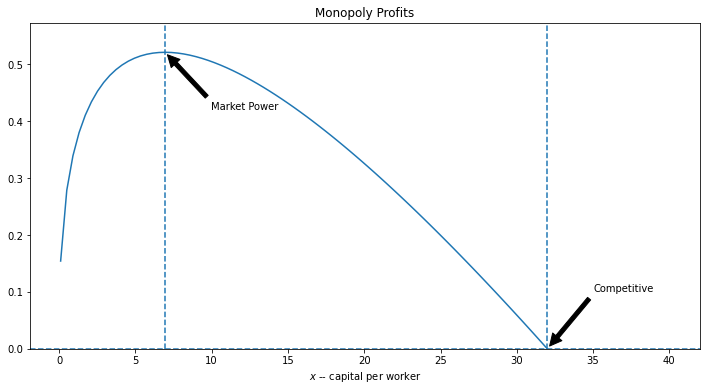

In [8]:
monopolyplot(rho=0.05)

In an open competitive economy all firm profits would be zero and the capital-labor ratio $x$ would be simply set from 

$$f'(x) = \rho$$

where $\rho$ is the world market price of capital.  This implies we can find the capital labor ratio as a function of $\rho$:

$$\beta x^{\beta -1}=ρ$$
$$x = \left ( \frac{\rho}{\beta} \right ) ^\frac{1}{\beta - 1}$$

Suppose we normalize the world rate or return to capital to $\rho=0.05$. Then equlibrium capital per worker in the competitive economy would be:

In [9]:
rho, beta = 0.05, 0.4
xC, _ = xoptimum(rho, beta)
print('%.1f' % xC)

32.0


The monopolist on the other hand sets x to:

$$f'(x) = \rho - xf''(x)$$

Note that $f''(x)$ can be written:

$$f''(x) =(\beta -1) \frac{f'(x)}{x}$$

which allows us to simplify the monopoly FOC to:

$$f'(x) = \frac{\rho}{\beta}$$

Given our assumed value of beta, this means a monopolist might maintain the rate of return on capital $1/ \beta$ times higher than the international market rate $\rho$, and resists capital inflows that might push this rate down. 

Solving for $x$ in this monopolized market gives:

$$x = \left ( \frac{\rho}{\beta^2} \right ) ^\frac{1}{\beta - 1}$$

In [10]:
_ , xM = xoptimum(rho, beta)
print('Capital per worker in the market-power distorted equilibrium: {:2.1f}'.format(xM))
print(' {:.0%} of the competitive level'.format(xM/xC))

Capital per worker in the market-power distorted equilibrium: 6.9
 22% of the competitive level


Indian income per capita will be only

In [11]:
print("{:5.0f} percent".format(100*f(xM)/f(xC)))

   54 percent


as high as in a competitive market without barriers to capital inflows.

This is an inefficient outcome but the elites who capture the profits/rents do pretty well. They earn 

In [12]:
print('profits = {:5.2f} or {:.0%} of total output'.format(profit(xM, rho), profit(xM,rho)/f(xM)))

profits =  0.52 or 24% of total output


## Extensions

Lucas does not cite their work but models of this sort were explored by trade economists in the 1980s (e.g. Feenstra (1980). 

In a model described later, Conning (2006) explores similar factor market power distortions in a model with heterogenous agents to make predictions about the size distribution of firms within each sector.

### Solving for maxima and roots numerically
This was an easy model to solve analytically, but let's solve it numerically to illustrate the use of the root solving (fsolve function from scipy optimize library) and minimization techniques (brentq from the same library). See the code section below first.

Let's setup first order condition functions to find the x that sets them to zero. 

For the competitive case: $f'(x) - \rho $ 
For the monopoly case:  $f'(x) - \rho -x f''(x)$

In [13]:
def cfoc(x):
    return mpx(x) - rho

def mfoc(x):
    return mpx(x) - rho + (beta-1)*mpx(x)

and solve for the root:

In [14]:
xC = fsolve(cfoc, 20)[0]
xC

32.0

Same as the analytical solution of course. 

Now let's find the $x$ that maximizes monopoly profits (we need to provide a guess value):

In [15]:
xM = fsolve(mfoc, 5)[0]
xM

6.948909098482633

We could have instead directly maximized profits (minimized negative profits) with an optimization routine:

In [16]:
def negprofit(x):
    return - profit(x, rho)

res = minimize(negprofit, 5, method='Nelder-Mead')
res.x[0]

6.94891357421875